# Assignment 2  <font color="blue"> (15 points) </font>
 
***

### General Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [ ]:

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(7 points)</font>

1. **<font color=blue> (1 point) </font>** Download `Credit.csv` from <http://faculty.marshall.usc.edu/gareth-james/ISL/data.html> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results. 
2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset. 
3.  **<font color=blue> (0.5 points) </font>** Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
4. **<font color=blue> (3 points) </font>** Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models: 
    + logistic regression, 
    + linear discriminant, and 
    + quadratic discriminant.
5. **<font color=blue> (0.5 points) </font>** Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
Compare the probabilities and comment.
    
6. **<font color=blue> (1.5 points) </font>** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment. 

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
% matplotlib inline

## Question A.1

In [5]:
# Question A.1: Download Credit.csv.
from google.colab import files
uploaded = files.upload()
credit_data = pd.read_csv('Credit.csv')

Saving Credit.csv to Credit (2).csv


In [7]:
# Question A.1: Print first 5 rows.
credit_data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [63]:
# Question A.1: Get number of rows and columns.
credit_data.shape

(400, 12)

In [20]:
# Question A.1: View columns.
credit_data.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [11]:
# Question A.1: Conduct a brief data exploration.
credit_data.describe(include='all')

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,No,Yes,Caucasian,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207,360,245,199,NaN
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,NaN,NaN,NaN,NaN,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,NaN,NaN,NaN,NaN,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,NaN,NaN,NaN,NaN,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,NaN,NaN,NaN,NaN,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,NaN,NaN,NaN,NaN,863.000000


In [10]:
# Question A.1: Check for data types.
credit_data.dtypes

Unnamed: 0      int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object

In [17]:
# Question A.1: Check for missing values.
credit_data.isna().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

In [18]:
# Question A.1: Check for null values.
credit_data.isnull().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

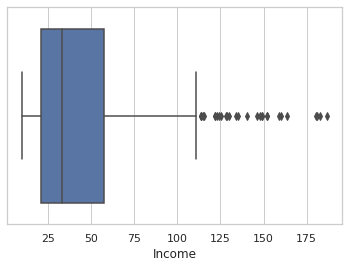

In [50]:
# Question A.1: Conduct univariate analysis for all features.
sns.boxplot(x=credit_data['Income'])
plt.show()

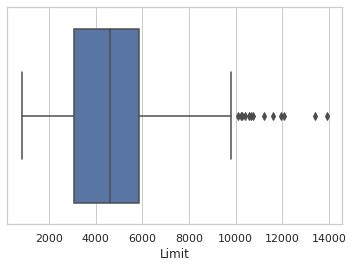

In [51]:
sns.boxplot(x=credit_data['Limit'])
plt.show()

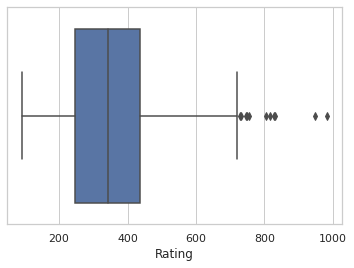

In [52]:
sns.boxplot(x=credit_data['Rating'])
plt.show()

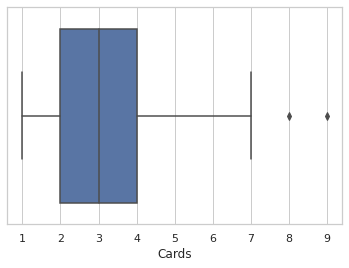

In [53]:
sns.boxplot(x=credit_data['Cards'])
plt.show()

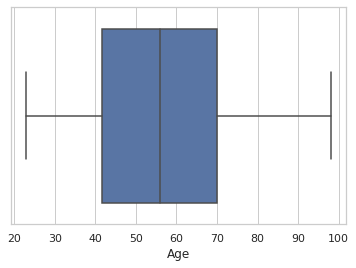

In [54]:
sns.boxplot(x=credit_data['Age'])
plt.show()

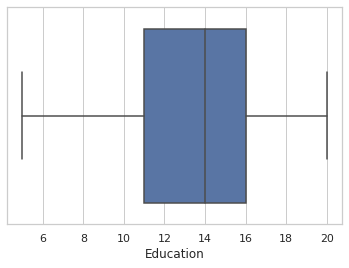

In [55]:
sns.boxplot(x=credit_data['Education'])
plt.show()

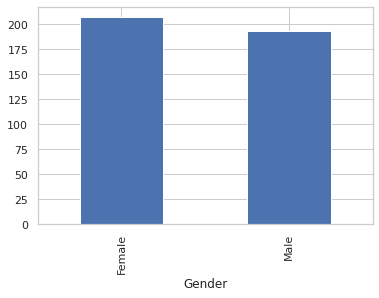

In [57]:
credit_data['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.show()

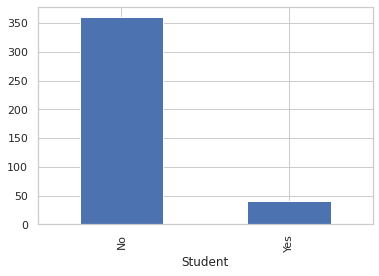

In [58]:
credit_data['Student'].value_counts().plot(kind='bar')
plt.xlabel('Student')
plt.show()

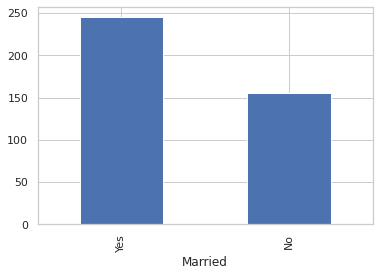

In [59]:
credit_data['Married'].value_counts().plot(kind='bar')
plt.xlabel('Married')
plt.show()

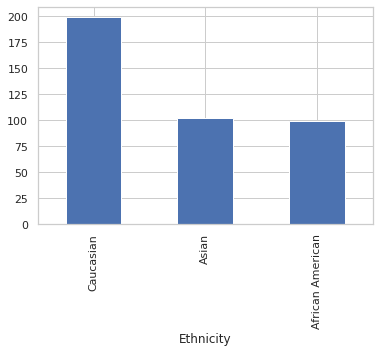

In [60]:
credit_data['Ethnicity'].value_counts().plot(kind='bar')
plt.xlabel('Ethnicity')
plt.show()

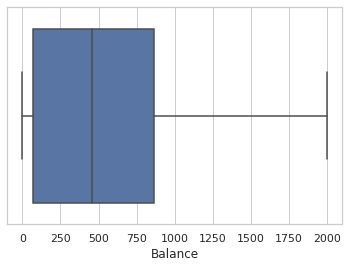

In [61]:
sns.boxplot(x=credit_data['Balance'])
plt.show()

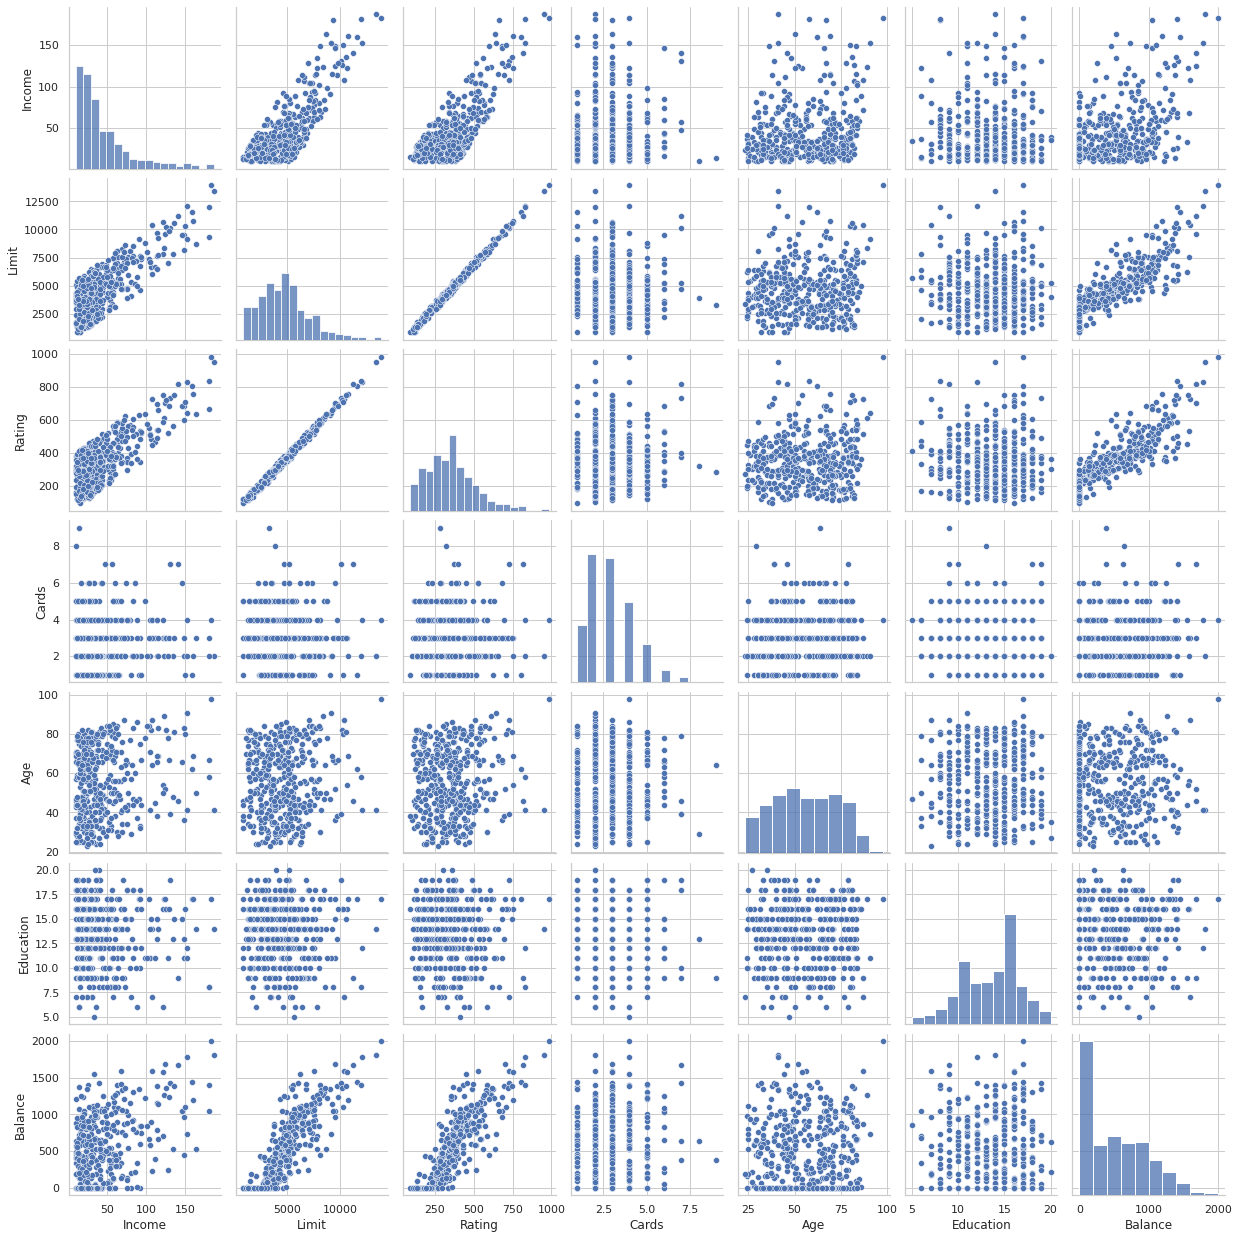

In [66]:
# Question A.1: Conduct bi-variate analysis.
credit_data = credit_data.drop('Unnamed: 0', 1)
sns.pairplot(credit_data)
plt.show()

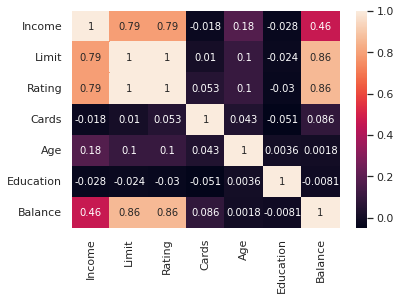

In [71]:
credit_data_corr = credit_data.corr()
sns.heatmap(credit_data_corr, 
            xticklabels = credit_data_corr.columns.values,
            yticklabels = credit_data_corr.columns.values,
            annot = True);
plt.show()

In [79]:
credit_data.pivot_table(index=credit_data['Gender'])

,Age,Balance,Cards,Education,Income,Limit,Rating
Gender,,,,,,,
Female,55.734300,529.536232,2.927536,13.434783,44.853928,4756.516908,356.265700
Male,55.595855,509.803109,2.989637,13.466321,45.610316,4713.165803,353.518135


In [78]:
credit_data.pivot_table(index=credit_data['Student'])

,Age,Balance,Cards,Education,Income,Limit,Rating
Student,,,,,,,
No,55.838889,480.369444,2.969444,13.375,44.988533,4740.222222,355.044444
Yes,54.125000,876.825000,2.850000,14.125,47.292050,4694.000000,354.000000


In [80]:
credit_data.pivot_table(index=credit_data['Married'])

,Age,Balance,Cards,Education,Income,Limit,Rating
Married,,,,,,,
No,57.251613,523.290323,2.974194,13.258065,43.641090,4645.303226,347.800000
Yes,54.665306,517.942857,2.946939,13.571429,46.217082,4792.726531,359.457143


In [81]:
credit_data.pivot_table(index=credit_data['Ethnicity'])

,Age,Balance,Cards,Education,Income,Limit,Rating
Ethnicity,,,,,,,
African American,57.505051,531.000000,2.959596,13.525253,47.682101,4881.595960,365.070707
Asian,53.911765,512.313725,2.970588,13.607843,44.187833,4607.823529,345.431373
Caucasian,55.653266,518.497487,2.949749,13.331658,44.521945,4728.462312,354.773869


### Question A1: Comments on data exploration.
*   All columns have an equal count of values, hence the data is balanced.
*   Only the categories have unique values, top values and frequences which is expected. 
*   The dataset does not contain empty/null values.
*   Box plots were used to illustrate the distribution of the numerical features.
*   Bar charts were used to illustrate the frequency in the categorical features.
*   Based on the pair plot and heat map, Limit and rating correlated entirely suggesting they might be linear combinations of each other.
*   Limit/rated also correlated strongly with balance and income.
*   Pivot tables were generated for all numerical features segregated by the categorical features. Average values were used for the numerical features. 


## Question A.2

In [86]:
# Question A.2: Generate dataframe with only the desired columns.
cdt = credit_data.drop(['Gender', 'Student', 'Married', 'Ethnicity'], axis=1, inplace=True)

In [94]:
# Question A.2: View the number of rows and columns of the trimmed dataset.
credit_data.shape

(400, 7)

## Question A.3

In [ ]:
# Question A.3: a binary variable Balance_1500.



## **Part B** <font color="blue">(8 points)</font>

Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it. 

  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 
  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$. 
  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**. 
  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`). 

  6. **<font color="blue">(1 point)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. **<font color="blue">(1.5 points)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`. 
  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.
